<a href="https://colab.research.google.com/github/moung1012/HelloAI/blob/main/211007%EC%B5%9C%EC%A2%85%EB%B3%B8_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [53]:
from google.colab import files
import io
data = files.upload()

Saving result.csv to result (6).csv


In [54]:
df = pd.read_csv('result.csv')

In [55]:
train=df.sample(frac=0.6)
test=df.sample(frac=0.2)
validation=df.sample(frac=0.2)

In [56]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

validation -= mean
validation /= std

In [57]:
train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)


In [58]:
test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

In [59]:
val_data_set = validation.values
x_val = val_data_set[:, 2:-1].astype(float)
y_val = val_data_set[:, -1].astype(float)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 11, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              12288     
_________________________________________________________________
dense_16 (Dense)             (None, 500)               512500    
_________________________________________________________________
dense_17 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_18 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total params: 735,489
Trainable params: 735,489
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

In [62]:
hist=model.fit(x_train, y_train, epochs=17, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/17
20/20 [==============================] - 1s 21ms/step - loss: 0.7333 - mae: 0.6791 - val_loss: 0.6581 - val_mae: 0.6477
Epoch 2/17
20/20 [==============================] - 0s 15ms/step - loss: 0.6393 - mae: 0.6356 - val_loss: 0.6592 - val_mae: 0.6500
Epoch 3/17
20/20 [==============================] - 0s 15ms/step - loss: 0.6215 - mae: 0.6209 - val_loss: 0.6087 - val_mae: 0.6118
Epoch 4/17
20/20 [==============================] - 0s 15ms/step - loss: 0.5890 - mae: 0.6041 - val_loss: 0.5808 - val_mae: 0.5955
Epoch 5/17
20/20 [==============================] - 0s 17ms/step - loss: 0.5660 - mae: 0.5879 - val_loss: 0.5526 - val_mae: 0.5760
Epoch 6/17
20/20 [==============================] - 0s 16ms/step - loss: 0.5428 - mae: 0.5683 - val_loss: 0.5914 - val_mae: 0.6076
Epoch 7/17
20/20 [==============================] - 0s 15ms/step - loss: 0.5181 - mae: 0.5612 - val_loss: 0.5898 - val_mae: 0.5972
Epoch 8/17
20/20 [==============================] - 0s 15ms/step - loss: 0.5246 - m

In [63]:
history_dict=hist.history
history_dict.keys()


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

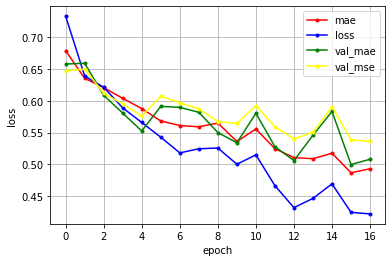

In [66]:
import matplotlib.pyplot as plt


y_acc = hist.history['mae']
y_loss = hist.history['loss']#x_len = np.arange(len(y_loss)) 
val_loss = hist.history['val_loss']
val_mae = hist.history['val_mae']
x_len = np.arange(17)

plt.plot(x_len, y_acc, marker='.', c='red', label="mae")
plt.plot(x_len, y_loss, marker='.', c='blue', label="loss")
plt.plot(x_len, val_loss, marker='.', c='green', label="val_mae")
plt.plot(x_len, val_mae, marker='.', c='yellow', label="val_mse")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[0.7027474641799927, 0.6031959652900696, 0.594721794128418, 0.5547035932540894, 0.5665457844734192, 0.5382364392280579, 0.5429749488830566, 0.5333656668663025, 0.5028649568557739, 0.4842444956302643, 0.49591565132141113, 0.4851948916912079, 0.5042318105697632, 0.4556419253349304, 0.4515148401260376, 0.4611662030220032, 0.44474712014198303, 0.41785845160484314, 0.40688833594322205, 0.4050419330596924, 0.38543176651000977, 0.4075498580932617, 0.388693630695343, 0.41144275665283203, 0.3673005998134613, 0.3603813350200653, 0.3673885762691498, 0.3417256772518158, 0.31293922662734985, 0.3077707588672638, 0.3087180256843567, 0.29371407628059387, 0.2776827812194824, 0.27187949419021606, 0.25926417112350464, 0.24722690880298615, 0.2723648250102997, 0.2655021846294403, 0.22600525617599487, 0.24879705905914307, 0.2224772423505783, 0.23156403005123138, 0.18151427805423737, 0.15746121108531952, 0.1514558494091034, 0.18172699213027954, 0.16515201330184937, 0.1542984992265

In [67]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 3ms/step - loss: 0.4429 - mae: 0.5086
## evaluation loss and_metrics ##
[0.4429323971271515, 0.5085846185684204]


In [ ]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)
print(y_test[0:1])

## yhat ##
[[-0.3831579]]
[-0.46985209]


In [ ]:
xhat = x_test
yhat = model.predict(xhat)

print("======predict======")
print(yhat)


print("======real======")
print(y_test)

======predict======
[[-0.38315803]
 [ 0.14075989]
 [-0.0139888 ]
 [ 0.03877446]
 [-0.55614203]
 [-1.6885016 ]
 [-0.00847028]
 [-0.66832256]
 [ 1.9932091 ]
 [ 1.1705623 ]
 [ 0.66317886]
 [-1.3686486 ]
 [ 0.04180726]
 [-1.6770726 ]
 [-1.4253337 ]
 [ 0.16962151]
 [ 1.5634924 ]
 [ 0.03067538]
 [-1.5956762 ]
 [ 0.47233808]
 [ 0.9020116 ]
 [-1.2567749 ]
 [ 2.2481573 ]
 [ 0.8719667 ]
 [ 0.70600575]
 [-1.6451612 ]
 [-0.37902108]
 [-1.3972641 ]
 [ 1.1014336 ]
 [-1.4457877 ]
 [-0.49882084]
 [ 1.4434899 ]
 [ 1.4030886 ]
 [ 1.3575623 ]
 [-1.7905142 ]
 [ 0.28970504]
 [-1.4595628 ]
 [ 0.67739886]
 [ 0.71228826]
 [-0.9112481 ]
 [ 0.96300614]
 [-0.941618  ]
 [-1.9105281 ]
 [-0.7087729 ]
 [ 0.35698146]
 [-1.7268084 ]
 [ 0.34789217]
 [-0.04484744]
 [ 1.3596399 ]
 [-0.11152287]
 [ 0.44642186]
 [-0.45169705]
 [-1.9498723 ]
 [ 1.2060428 ]
 [-0.47369084]
 [-0.03690689]
 [ 0.42043942]
 [ 1.2900791 ]
 [-0.0588075 ]
 [ 0.5382323 ]
 [ 0.01856804]
 [ 1.0331929 ]
 [ 0.9117177 ]
 [ 0.89940184]
 [-0.159799  ]
 [-1.

<function matplotlib.pyplot.show>

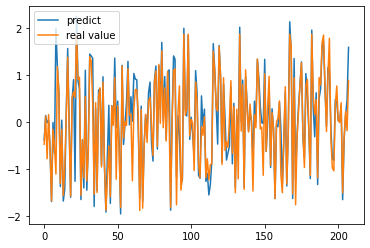

In [ ]:
plt.plot(model.predict(x_test),label='predict')
plt.plot(y_test, label='real value')
#plt.plot(model.predict(x_test)-y_test)
plt.xlim(0,50)
plt.legend()
plt.show